# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('fraud dataset.csv')

# Data Understanding

In [3]:
df.head()

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,...,1,9,False,3,999,1.332.292.784,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,...,5,8,False,3,999,1.369.047.619,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,...,5,8,False,3,999,15523460.4,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,...,2,4,False,3,999,7.117.647.059,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,...,1,9,False,3,999,617.968.254,2500000.0,100000.0,1.46,0


In [4]:
df.shape

(12885, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12885 entries, 0 to 12884
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          12885 non-null  int64  
 1   id_tanggal_transaksi_awal   12885 non-null  int64  
 2   tanggal_transaksi_awal      12885 non-null  int64  
 3   tipe_kartu                  12885 non-null  int64  
 4   id_merchant                 12885 non-null  int64  
 5   nama_merchant               12885 non-null  int64  
 6   tipe_mesin                  12885 non-null  int64  
 7   tipe_transaksi              12885 non-null  int64  
 8   nama_transaksi              12885 non-null  int64  
 9   nilai_transaksi             12885 non-null  float64
 10  id_negara                   12885 non-null  int64  
 11  nama_negara                 12885 non-null  int64  
 12  nama_kota                   12885 non-null  int64  
 13  lokasi_mesin                128

In [6]:
df.describe()

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,status_transaksi,bank_pemilik_kartu,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,12885.000000,1.288500e+04,1.288500e+04,12885.000000,12885.000000,12885.000000,1.288500e+04,12885.000000,12885.000000,1.288500e+04,...,12885.000000,12885.000000,12885.000000,12885.000000,12885.0,12885.0,1.286500e+04,1.286500e+04,12865.000000,12885.000000
mean,7502.764765,2.457490e+06,2.457541e+06,85.377416,39176.806442,1679.462398,1.648223e+06,178.633139,10.735041,1.316500e+06,...,2.854560,1.932480,1.402561,8.242142,3.0,999.0,1.227942e+07,7.687497e+04,2.439307,0.068762
std,4325.423057,1.047998e+02,1.088756e+02,40.897745,124106.204947,359.889761,9.909188e+05,142.523654,3.891172,2.849922e+06,...,0.825389,0.250931,1.012147,1.717256,0.0,0.0,1.643170e+07,6.827365e+05,1.395700,0.253059
min,1.000000,2.457297e+06,2.457303e+06,0.000000,-2.000000,2.000000,-4.000000e+00,26.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,3.000000,3.0,999.0,3.800000e+04,1.000000e+00,1.000000,0.000000
25%,3773.000000,2.457404e+06,2.457451e+06,93.000000,-2.000000,1798.000000,1.130699e+06,26.000000,9.000000,2.000000e+05,...,2.000000,2.000000,1.000000,9.000000,3.0,999.0,2.500000e+06,2.500000e+04,1.680000,0.000000
50%,7471.000000,2.457501e+06,2.457544e+06,103.000000,-2.000000,1798.000000,1.835121e+06,156.000000,10.000000,5.632500e+05,...,3.000000,2.000000,1.000000,9.000000,3.0,999.0,6.000000e+06,3.700000e+04,2.100000,0.000000
75%,11262.000000,2.457581e+06,2.457632e+06,111.000000,-2.000000,1798.000000,2.417111e+06,301.000000,11.000000,1.250000e+06,...,3.000000,2.000000,1.000000,9.000000,3.0,999.0,1.500000e+07,6.320000e+04,2.790000,0.000000
max,15000.000000,2.457662e+06,2.457754e+06,138.000000,720990.000000,1859.000000,6.928943e+06,640.000000,20.000000,7.500000e+07,...,4.000000,2.000000,5.000000,9.000000,3.0,999.0,1.000000e+08,7.500000e+07,19.780000,1.000000


# EDA

### Handling abnormal data

In [7]:
df['rata_rata_nilai_transaksi'] = df['rata_rata_nilai_transaksi'].str.replace('\.(?=.*?\.)', '')
df['rata_rata_nilai_transaksi'] = df['rata_rata_nilai_transaksi'].astype('float64')

### Data Distribution

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='rata_rata_jumlah_transaksi', ylabel='Density'>

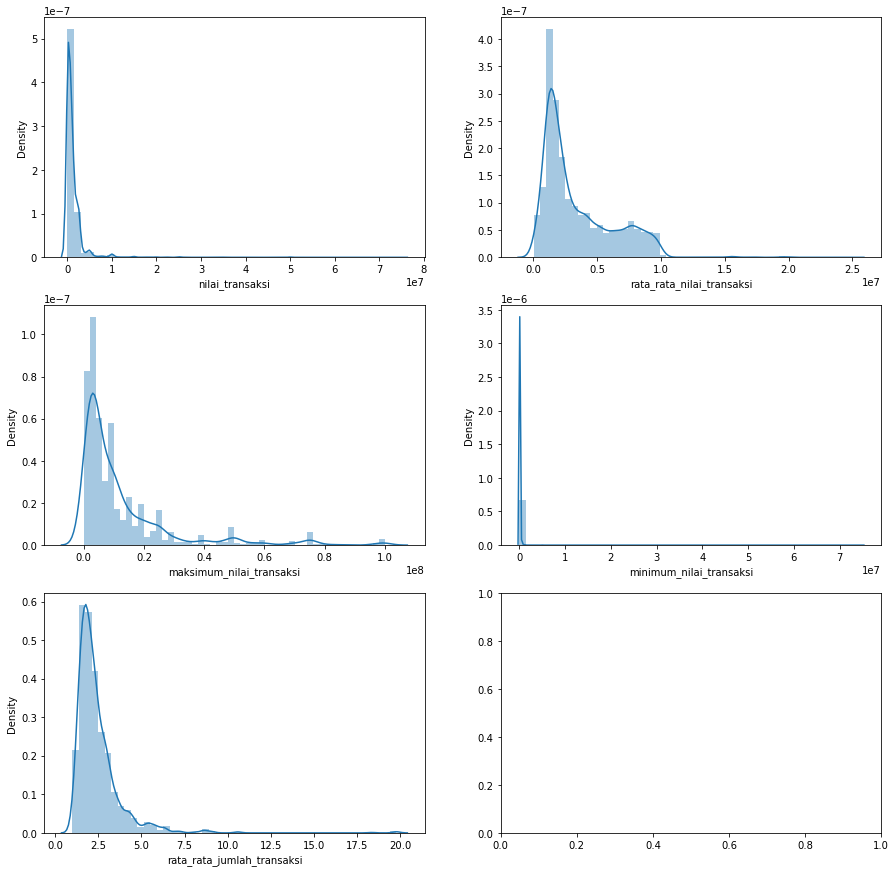

In [8]:
fig, axs = plt.subplots(3,2,figsize = (15,15))
sns.distplot(df['nilai_transaksi'], ax = axs[0,0])
sns.distplot(df['rata_rata_nilai_transaksi'], ax = axs[0,1])
sns.distplot(df['maksimum_nilai_transaksi'], ax = axs[1,0])
sns.distplot(df['minimum_nilai_transaksi'], ax = axs[1,1])
sns.distplot(df['rata_rata_jumlah_transaksi'], ax = axs[2,0])

### Data Target Proportion

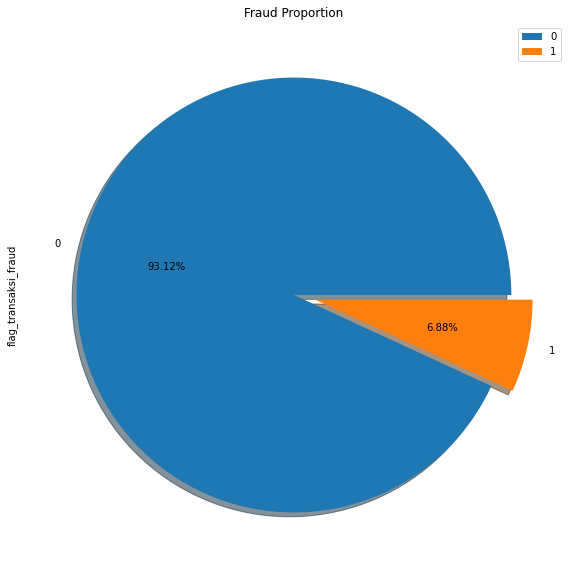

In [9]:
plt.figure(figsize=(10,10))
df['flag_transaksi_fraud'].value_counts().plot.pie(shadow=True, explode = [0,0.1],autopct='%1.2f%%')
plt.title("Fraud Proportion")
plt.legend()
plt.show()

### Variables Correlation

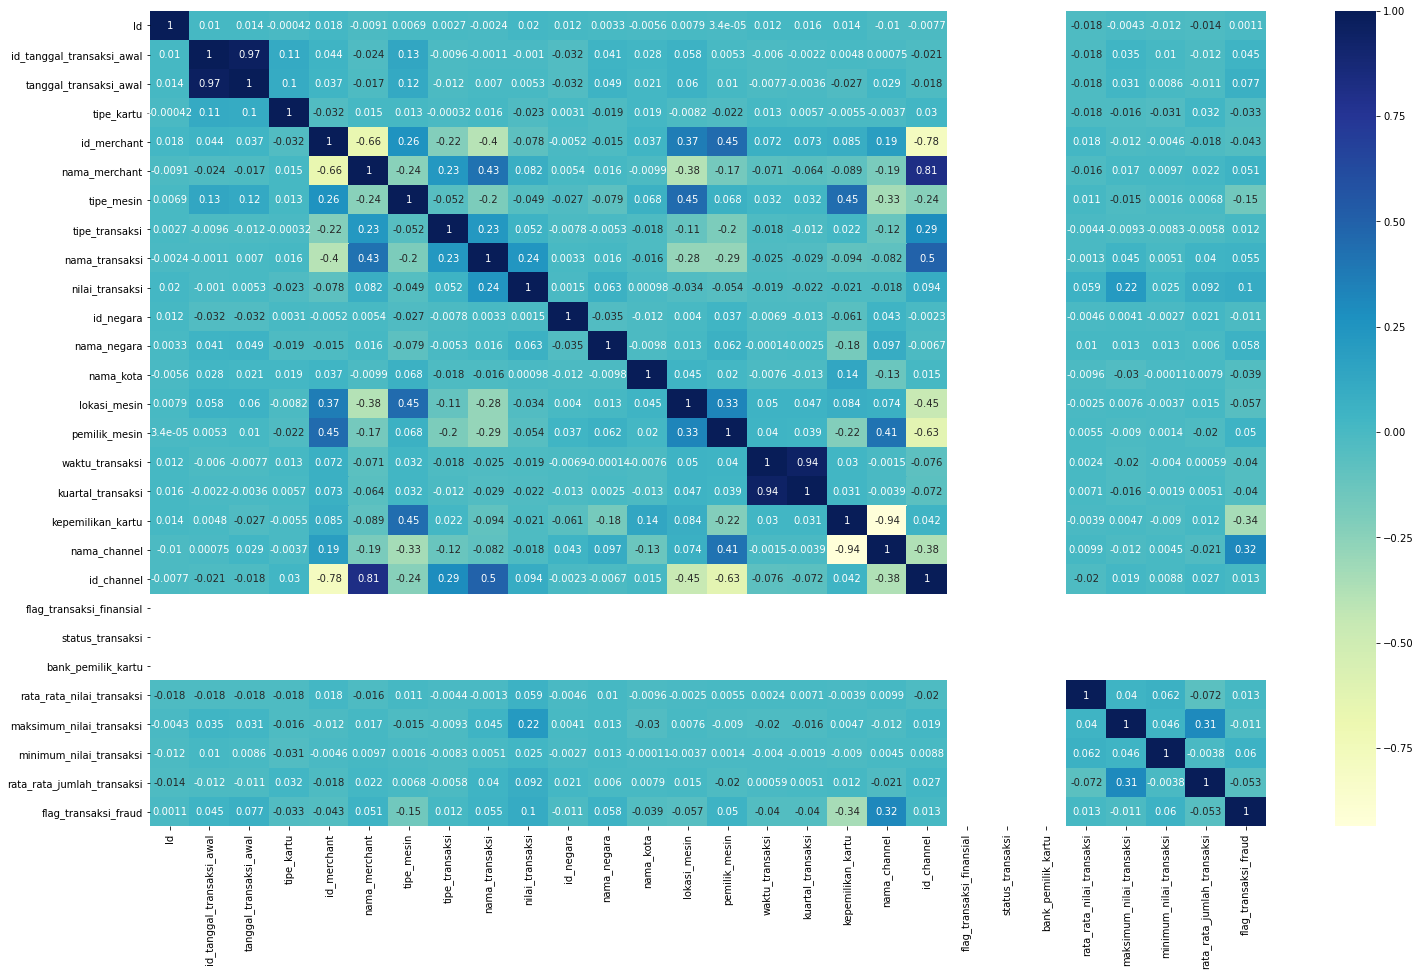

In [10]:
plt.figure(figsize = (25, 15))
sns.heatmap(df.corr(), 
            annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

# Data Cleaning

### Checking Duplicates Data

In [11]:
df.drop_duplicates(inplace = True)

### Checking Data Types

In [12]:
df.dtypes

Id                              int64
id_tanggal_transaksi_awal       int64
tanggal_transaksi_awal          int64
tipe_kartu                      int64
id_merchant                     int64
nama_merchant                   int64
tipe_mesin                      int64
tipe_transaksi                  int64
nama_transaksi                  int64
nilai_transaksi               float64
id_negara                       int64
nama_negara                     int64
nama_kota                       int64
lokasi_mesin                    int64
pemilik_mesin                   int64
waktu_transaksi                 int64
kuartal_transaksi               int64
kepemilikan_kartu               int64
nama_channel                    int64
id_channel                      int64
flag_transaksi_finansial         bool
status_transaksi                int64
bank_pemilik_kartu              int64
rata_rata_nilai_transaksi     float64
maksimum_nilai_transaksi      float64
minimum_nilai_transaksi       float64
rata_rata_ju

### Checking boolean type data and single value

In [13]:
df['flag_transaksi_finansial'].value_counts()

False    12885
Name: flag_transaksi_finansial, dtype: int64

In [14]:
df['status_transaksi'].value_counts()

3    12885
Name: status_transaksi, dtype: int64

In [15]:
df['bank_pemilik_kartu'].value_counts()

999    12885
Name: bank_pemilik_kartu, dtype: int64

In [16]:
df.drop(columns = ['flag_transaksi_finansial','status_transaksi', 'bank_pemilik_kartu', 
                   'id_tanggal_transaksi_awal', 'id_merchant', 'id_negara', 'id_channel'], inplace = True)

In [17]:
df.dtypes

Id                              int64
tanggal_transaksi_awal          int64
tipe_kartu                      int64
nama_merchant                   int64
tipe_mesin                      int64
tipe_transaksi                  int64
nama_transaksi                  int64
nilai_transaksi               float64
nama_negara                     int64
nama_kota                       int64
lokasi_mesin                    int64
pemilik_mesin                   int64
waktu_transaksi                 int64
kuartal_transaksi               int64
kepemilikan_kartu               int64
nama_channel                    int64
rata_rata_nilai_transaksi     float64
maksimum_nilai_transaksi      float64
minimum_nilai_transaksi       float64
rata_rata_jumlah_transaksi    float64
flag_transaksi_fraud            int64
dtype: object

### Checking Missing Values

In [18]:
df.isna().sum()

Id                             0
tanggal_transaksi_awal         0
tipe_kartu                     0
nama_merchant                  0
tipe_mesin                     0
tipe_transaksi                 0
nama_transaksi                 0
nilai_transaksi                0
nama_negara                    0
nama_kota                      0
lokasi_mesin                   0
pemilik_mesin                  0
waktu_transaksi                0
kuartal_transaksi              0
kepemilikan_kartu              0
nama_channel                   0
rata_rata_nilai_transaksi     20
maksimum_nilai_transaksi      20
minimum_nilai_transaksi       20
rata_rata_jumlah_transaksi    20
flag_transaksi_fraud           0
dtype: int64

In [21]:
df = df.fillna(0)

In [22]:
df.isnull().sum()

Id                            0
tanggal_transaksi_awal        0
tipe_kartu                    0
nama_merchant                 0
tipe_mesin                    0
tipe_transaksi                0
nama_transaksi                0
nilai_transaksi               0
nama_negara                   0
nama_kota                     0
lokasi_mesin                  0
pemilik_mesin                 0
waktu_transaksi               0
kuartal_transaksi             0
kepemilikan_kartu             0
nama_channel                  0
rata_rata_nilai_transaksi     0
maksimum_nilai_transaksi      0
minimum_nilai_transaksi       0
rata_rata_jumlah_transaksi    0
flag_transaksi_fraud          0
dtype: int64

### Outlier Detection

In [23]:
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

<AxesSubplot:xlabel='rata_rata_jumlah_transaksi'>

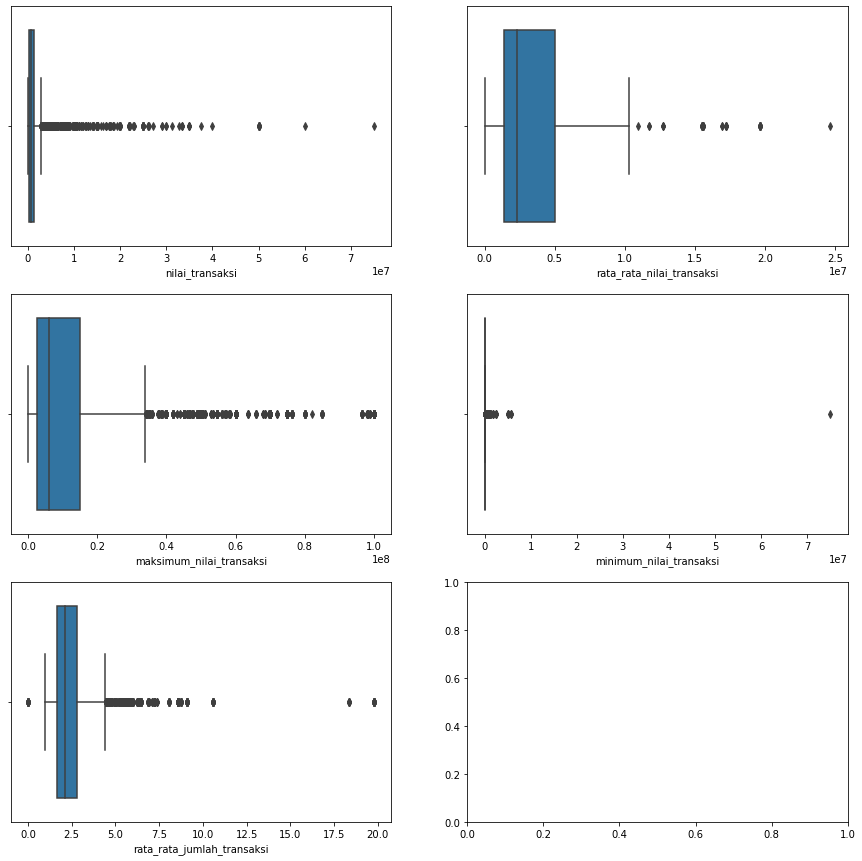

In [24]:
fig, axs = plt.subplots(3,2,figsize = (15,15))
sns.boxplot(df['nilai_transaksi'], ax = axs[0,0])
sns.boxplot(df['rata_rata_nilai_transaksi'], ax = axs[0,1])
sns.boxplot(df['maksimum_nilai_transaksi'], ax = axs[1,0])
sns.boxplot(df['minimum_nilai_transaksi'], ax = axs[1,1])
sns.boxplot(df['rata_rata_jumlah_transaksi'], ax = axs[2,0])

### Undersampling

In [26]:
from sklearn.utils import resample
data_major = df[df["flag_transaksi_fraud"]==0]
data_minor = df[df["flag_transaksi_fraud"]==1]
 
sampling = resample(data_major, replace=False, n_samples=len(data_minor), random_state=123)
data_baru = pd.concat([sampling, data_minor])

In [27]:
data_baru["flag_transaksi_fraud"].value_counts()

1    886
0    886
Name: flag_transaksi_fraud, dtype: int64

In [28]:
data_baru

,Id,tanggal_transaksi_awal,tipe_kartu,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,nama_negara,nama_kota,...,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
6982,13986,2457451,93,1798,1342283,385,11,1500000.0,5,60,...,613,120959,3,2,1,1151101.297,7244000.0,25000.0,1.64,0
11574,12143,2457388,111,1798,888,238,9,1800000.0,5,128,...,613,125919,3,2,1,9025217.091,7114500.0,10000.0,2.44,0
11,688,2457344,111,1798,2614170,26,10,1250000.0,5,70,...,613,160632,3,2,1,1368238.789,5300000.0,44600.0,2.83,0
1812,14433,2457418,103,1798,2505746,385,11,2000000.0,5,265,...,613,170729,3,2,1,2296905.312,5606000.0,500000.0,2.63,0
8620,1259,2457515,104,1798,1590941,26,10,300000.0,5,132,...,613,131345,3,2,1,1713952.174,1500000.0,23744.0,1.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12851,13654,2457353,93,1798,-3,156,12,500000.0,5,208,...,567,135855,3,1,5,1755681.165,8000000.0,25000.0,3.83,1
12853,8475,2457516,103,1798,1331131,159,19,10000000.0,5,265,...,613,103339,2,2,1,4939687.667,2751000.0,25000.0,1.87,1
12862,12099,2457446,111,1798,1247500,385,11,1250000.0,5,128,...,613,134942,3,2,1,369200.000,1000000.0,51500.0,1.89,1
12864,12921,2457602,111,1798,-3,156,12,2100000.0,5,128,...,164,154634,3,1,5,2047450.495,12500000.0,52400.0,4.50,1


# Data Partition

In [29]:
from sklearn.model_selection import train_test_split

data_baru=data_baru.drop(["Id"],axis=1)

#Memisah variabel prediktor dan target
x=data_baru.drop(["flag_transaksi_fraud"],axis=1)
y=data_baru["flag_transaksi_fraud"]

##partition data into data training and data testing
train_X, test_X, train_Y, test_Y= train_test_split(x,y,test_size = .20 ,random_state = 112)

# Load data predict

In [30]:
dp = pd.read_csv('Data Predict.csv')
dp

,Id,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi
0,6678,2457607,2457703,111,-2,1798,1590933,385,11,1250000,...,2,1,9,False,3,999,2.877.203.488,2300000.0,21600.0,1.20
1,437,2457579,2457592,93,-2,1798,2687662,26,10,50000,...,2,1,9,False,3,999,3.389.741.935,1400000.0,64524.0,1.52
2,1696,2457349,2457359,103,-2,1798,2254860,385,11,500000,...,2,1,9,False,3,999,797.473.227,1750000.0,250000.0,1.46
3,8868,2457623,2457637,0,128022,1254,2688775,58,6,45000,...,2,2,4,False,3,999,6.457.195.423,8000000.0,23000.0,2.90
4,7014,2457467,2457499,93,-2,1798,-3,156,12,1000000,...,1,5,8,False,3,999,2.116.285.714,12000000.0,200000.0,2.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,406,2457417,2457507,111,-2,1798,1154047,385,11,1250000,...,2,1,9,False,3,999,7.110.078.384,3250000.0,50000.0,1.76
236,13276,2457476,2457568,103,-2,1798,1818254,301,16,1000000,...,2,1,9,False,3,999,7.489.285.714,6200000.0,15.0,2.35
237,10926,2457378,2457397,0,90479,519,2573188,58,6,415000,...,2,2,4,False,3,999,1.675.588.606,5000000.0,103700.0,1.53
238,5965,2457641,2457664,103,-2,1798,219608,26,10,150000,...,2,1,9,False,3,999,6.604.166.667,5440000.0,50000.0,1.46


In [31]:
dp['rata_rata_nilai_transaksi'] = dp['rata_rata_nilai_transaksi'].str.replace('\.(?=.*?\.)', '')
dp['rata_rata_nilai_transaksi'] = dp['rata_rata_nilai_transaksi'].astype('float64')

In [32]:
dp.isna().sum()

Id                            0
id_tanggal_transaksi_awal     0
tanggal_transaksi_awal        0
tipe_kartu                    0
id_merchant                   0
nama_merchant                 0
tipe_mesin                    0
tipe_transaksi                0
nama_transaksi                0
nilai_transaksi               0
id_negara                     0
nama_negara                   0
nama_kota                     0
lokasi_mesin                  0
pemilik_mesin                 0
waktu_transaksi               0
kuartal_transaksi             0
kepemilikan_kartu             0
nama_channel                  0
id_channel                    0
flag_transaksi_finansial      0
status_transaksi              0
bank_pemilik_kartu            0
rata_rata_nilai_transaksi     1
maksimum_nilai_transaksi      1
minimum_nilai_transaksi       1
rata_rata_jumlah_transaksi    1
dtype: int64

In [33]:
dp=dp.fillna(0)

In [34]:
dp.drop(columns = ['flag_transaksi_finansial','status_transaksi', 'bank_pemilik_kartu', 
                   'id_tanggal_transaksi_awal', 'id_merchant', 'id_negara', 'id_channel'], inplace = True)

# Logistic Regression

In [35]:
import statsmodels.api as sm 
exog = sm.add_constant(train_X)
log_reg = sm.Logit(train_Y, exog).fit() 
print(log_reg.summary())

         Current function value: 0.539397
         Iterations: 35
                            Logit Regression Results                            
Dep. Variable:     flag_transaksi_fraud   No. Observations:                 1417
Model:                            Logit   Df Residuals:                     1397
Method:                             MLE   Df Model:                           19
Date:                  Sun, 30 May 2021   Pseudo R-squ.:                  0.2218
Time:                          15:29:50   Log-Likelihood:                -764.33
converged:                        False   LL-Null:                       -982.11
Covariance Type:              nonrobust   LLR p-value:                 1.704e-80
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -7559.4369   1458.667     -5.182      0.000   -1.04e+04   -4700.502
t

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
labels = ['kuartal_transaksi', 'nama_channel', 'rata_rata_nilai_transaksi', 'pemilik_mesin', 'tipe_kartu', 
         'maksimum_nilai_transaksi', 'nama_negara', 'nama_transaksi', 'nama_merchant', 'nama_kota',
         'tipe_mesin', 'lokasi_mesin', 'waktu_transaksi']

exog = sm.add_constant(train_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.544668
         Iterations 32
                            Logit Regression Results                            
Dep. Variable:     flag_transaksi_fraud   No. Observations:                 1417
Model:                            Logit   Df Residuals:                     1410
Method:                             MLE   Df Model:                            6
Date:                  Sun, 30 May 2021   Pseudo R-squ.:                  0.2141
Time:                          15:36:38   Log-Likelihood:                -771.79
converged:                         True   LL-Null:                       -982.11
Covariance Type:              nonrobust   LLR p-value:                 1.023e-87
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -7091.3028   1417.055     -5.004

### Evaluation

In [53]:
pred_lg=log_reg.predict(sm.add_constant(test_X.drop(labels=labels,axis=1)))

In [55]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logreg on test data: ",accuracy_score(test_Y,np.round(pred_lg)))

Accuracy for Logreg on test data:  0.7408450704225352


<AxesSubplot:>

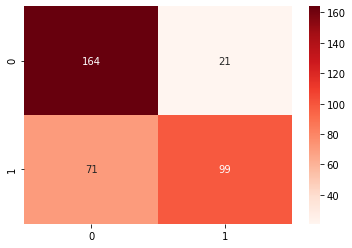

In [57]:
from sklearn.metrics import confusion_matrix
CF_lg=confusion_matrix(test_Y, np.round(pred_lg))
sns.heatmap(CF_lg, annot=True, cmap = 'Reds', fmt = 'g')

In [59]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, np.round(pred_lg)))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       185
           1       0.82      0.58      0.68       170

    accuracy                           0.74       355
   macro avg       0.76      0.73      0.73       355
weighted avg       0.76      0.74      0.73       355



In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,np.round(pred_lg))

0.7344197138314786

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
rfc = RandomForestClassifier(random_state=123)

In [63]:
param_grid = { 
    'n_estimators': [200,500,1000],
    'max_features': ['auto', 'log2'],
    'criterion' :['entropy','gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

In [65]:
CV_rfc.fit(train_X, train_Y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [66]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 500}

In [67]:
CV_rfc.best_score_

0.7755879647878071

### Evaluation

In [68]:
pred_rfc=CV_rfc.predict(test_X)

In [69]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,pred_rfc))

Accuracy for Random Forest on CV data:  0.8056338028169014


<AxesSubplot:>

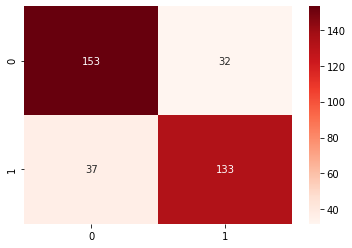

In [70]:
CF_rfc=confusion_matrix(test_Y, pred_rfc)
sns.heatmap(CF_rfc, annot=True, cmap = 'Reds', fmt = 'g')

In [71]:
target_names = ['No','Yes']
print(classification_report(test_Y,pred_rfc, target_names=target_names))

              precision    recall  f1-score   support

          No       0.81      0.83      0.82       185
         Yes       0.81      0.78      0.79       170

    accuracy                           0.81       355
   macro avg       0.81      0.80      0.81       355
weighted avg       0.81      0.81      0.81       355



In [72]:
roc_auc_score(test_Y,pred_rfc)

0.8046899841017487

### Feature Importance

In [73]:
rfc_2 = RandomForestClassifier(random_state=123, criterion = 'gini', max_features= 'auto', n_estimators= 500)
rfc_2.fit(train_X, train_Y)

RandomForestClassifier(n_estimators=500, random_state=123)

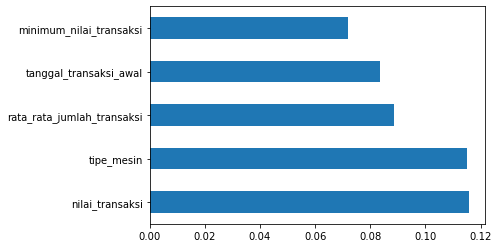

In [80]:
feat_imp_rfc = pd.Series(rfc_2.feature_importances_, index=train_X.columns) 
feat_imp_rfc.nlargest(5).plot(kind='barh')
plt.show()

### Feature Selection

In [81]:
from sklearn.feature_selection import SelectFromModel
rfc_sfm = SelectFromModel(rfc_2)
rfc_sfm.fit(train_X, train_Y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=123))

In [82]:
train_X_rfc_imp = rfc_sfm.transform(train_X)
test_X_rfc_imp = rfc_sfm.transform(test_X)

rfc_imp = RandomForestClassifier(random_state=123, criterion = 'gini', max_features= 'auto', n_estimators= 500)
rfc_imp.fit(train_X_rfc_imp, train_Y)

RandomForestClassifier(n_estimators=500, random_state=123)

In [83]:
pred_rfc_imp = rfc_imp.predict(test_X_rfc_imp)
target_names = ['No','Yes']
print(classification_report(test_Y,pred_rfc_imp, target_names=target_names))

              precision    recall  f1-score   support

          No       0.81      0.81      0.81       185
         Yes       0.79      0.79      0.79       170

    accuracy                           0.80       355
   macro avg       0.80      0.80      0.80       355
weighted avg       0.80      0.80      0.80       355



In [84]:
roc_auc_score(test_Y,pred_rfc_imp)

0.8024642289348171

# Decision Tree

In [85]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier()
param_grid = {"criterion":["gini","entropy"],
              'min_samples_split': [2,5,10,50,100],
             "max_depth":[3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [86]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 2)
CV_dtc.fit(train_X, train_Y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'min_samples_split': [2, 5, 10, 50, 100]})

In [87]:
CV_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 100}

### Evaluation

In [88]:
pred_dtc=CV_dtc.predict(test_X)

In [89]:
print("Accuracy for Decision Tree on CV data: ",accuracy_score(test_Y,pred_dtc))

Accuracy for Decision Tree on CV data:  0.7830985915492957


<AxesSubplot:>

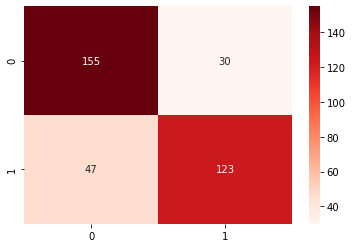

In [90]:
CF_dtc=confusion_matrix(test_Y, pred_dtc)
sns.heatmap(CF_dtc, annot=True, cmap = 'Reds', fmt = 'g')

In [91]:
target_names = ['No','Yes']
print(classification_report(test_Y, pred_dtc, target_names=target_names))

              precision    recall  f1-score   support

          No       0.77      0.84      0.80       185
         Yes       0.80      0.72      0.76       170

    accuracy                           0.78       355
   macro avg       0.79      0.78      0.78       355
weighted avg       0.78      0.78      0.78       355



In [92]:
roc_auc_score(test_Y,pred_dtc)

0.7806836248012718

### Feature Importance

In [93]:
dtc_2 = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_split= 100)
dtc_2.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=100)

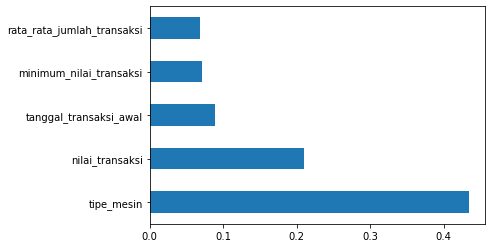

In [94]:
feat_imp_dtc = pd.Series(dtc_2.feature_importances_, index=train_X.columns) 
feat_imp_dtc.nlargest(5).plot(kind='barh')
plt.show()

# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knnc=KNeighborsClassifier()
param_grid = { 
    'n_neighbors': [2,3,4,5,6],
    'metric': ['euclidean','manhatan']
}

In [97]:
from sklearn.model_selection import GridSearchCV
CV_knnc = GridSearchCV(estimator=knnc, param_grid=param_grid, cv= 2)
CV_knnc.fit(train_X, train_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable fu

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhatan'],
                         'n_neighbors': [2, 3, 4, 5, 6]})

In [98]:
CV_knnc.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

## Evaluation

In [99]:
pred_knnc=CV_knnc.predict(test_X)

In [100]:
print("Accuracy for KNN on CV data: ",accuracy_score(test_Y,pred_knnc))

Accuracy for KNN on CV data:  0.6732394366197183


<AxesSubplot:>

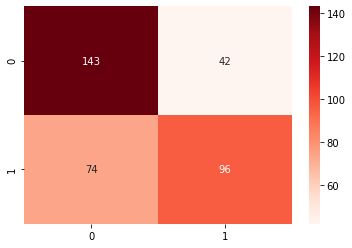

In [101]:
CF_knnc=confusion_matrix(test_Y, pred_knnc)
sns.heatmap(CF_knnc, annot=True, cmap = 'Reds', fmt = 'g')

In [102]:
target_names = ['No','Yes']
print(classification_report(test_Y, pred_knnc, target_names=target_names))

              precision    recall  f1-score   support

          No       0.66      0.77      0.71       185
         Yes       0.70      0.56      0.62       170

    accuracy                           0.67       355
   macro avg       0.68      0.67      0.67       355
weighted avg       0.68      0.67      0.67       355



In [103]:
roc_auc_score(test_Y,pred_knnc)

0.6688394276629571

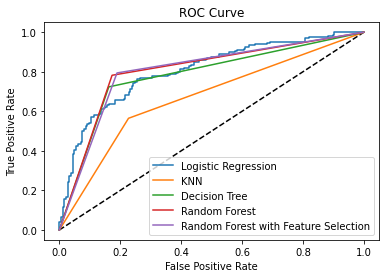

In [105]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_lg, tpr_lg, thresholds_lg = roc_curve(test_Y, pred_lg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_Y, pred_knnc)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(test_Y, pred_dtc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(test_Y, pred_rfc)
fpr_rfc_imp, tpr_rfc_imp, thresholds_rfc_imp = roc_curve(test_Y, pred_rfc_imp)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lg, tpr_lg, label = 'Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label = 'KNN')
plt.plot(fpr_dtc, tpr_dtc, label = 'Decision Tree')
plt.plot(fpr_rfc, tpr_rfc, label = 'Random Forest')
plt.plot(fpr_rfc_imp, tpr_rfc_imp, label = 'Random Forest with Feature Selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Model Deployment

In [106]:
pred_new_rfc = CV_rfc.predict(dp.drop(columns=['Id'],axis=1))

In [107]:
dp["flag_transaksi_fraud"]=pred_new_rfc
submission=dp.loc[:,["Id","flag_transaksi_fraud"]]
submission.to_csv("submission_1.csv", index=False)

In [108]:
dp["flag_transaksi_fraud"].value_counts()

0    185
1     55
Name: flag_transaksi_fraud, dtype: int64